In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.constants as cnt

In [83]:
data = np.loadtxt('data/Kennlinie_Anode_GND/71_6.txt', skiprows=3)
offset = 300
U = data[offset:,0]
I = data[offset:, 1]
window_size = 30
polyorder = 2
I = savgol_filter(I, window_size, polyorder)

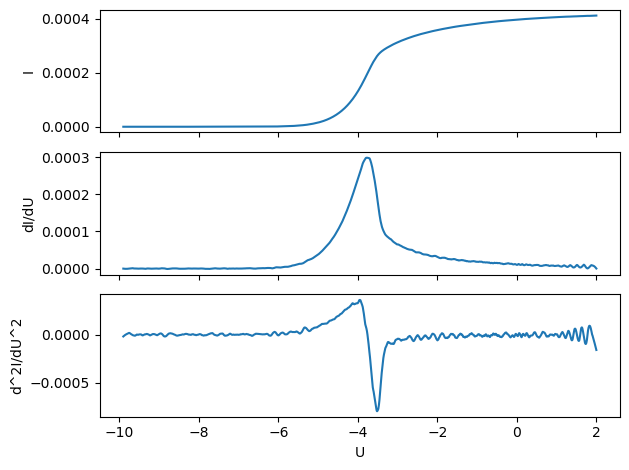

In [84]:
# Calculate the first derivative
dI_dU = np.gradient(I, U)

dI_dU = savgol_filter(dI_dU, window_size, polyorder)

# Calculate the second derivative
d2I_dU2 = np.gradient(dI_dU, U)
d2I_dU2 = savgol_filter(d2I_dU2, window_size, polyorder)

# Plot the original data, first derivative, and second derivative
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].plot(U, I)
ax[0].set_ylabel('I')

ax[1].plot(U, dI_dU)
ax[1].set_ylabel('dI/dU')

ax[2].plot(U, d2I_dU2)
ax[2].set_xlabel('U')
ax[2].set_ylabel('d^2I/dU^2')

plt.tight_layout()
plt.show()

[(0.0, 5.7010000000000005), Text(0.5, 0, '$E / \\mathrm{eV}$')]

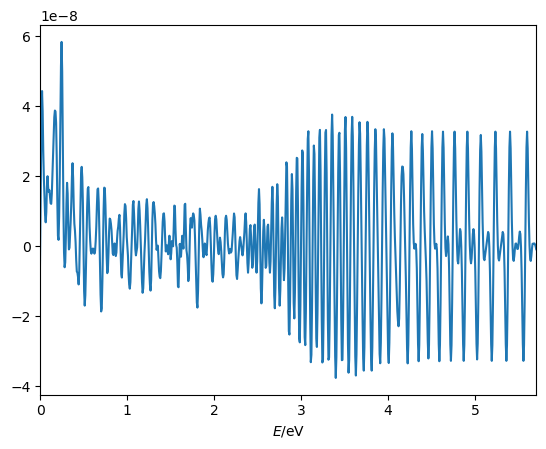

In [73]:
fig2, ax2 = plt.subplots()
A = 1
f_U = - 1/(2 * np.pi) * cnt.m_e **2 / cnt.e **3 * 1/A * d2I_dU2
E = U - U[np.argmax(dI_dU)]
ax2.plot(E, f_U)
ax2.set(xlim=[0, max(E)], xlabel="$E / \\mathrm{eV}$")

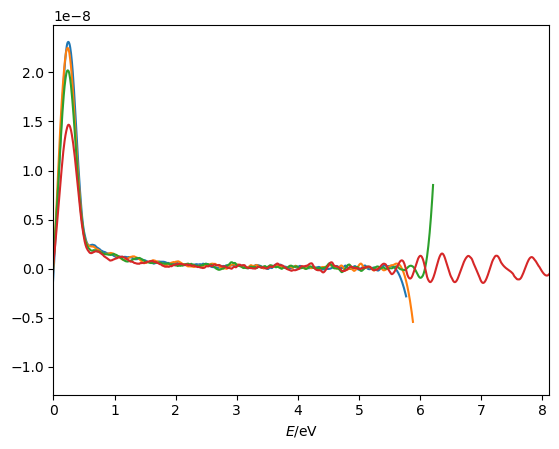

In [85]:
def plot_energy_distrib(filename, ax):
    data = np.loadtxt(f'data/Kennlinie_Anode_GND/{filename}.txt', skiprows=3)
    offset = 300
    U = data[offset:,0]
    I = data[offset:, 1]
    window_size = 50
    polyorder = 3
    I = savgol_filter(I, window_size, polyorder)
    dI_dU = np.gradient(I, U)
    dI_dU = savgol_filter(dI_dU, window_size, polyorder)
    # Calculate the second derivative
    d2I_dU2 = np.gradient(dI_dU, U)
    d2I_dU2 = savgol_filter(d2I_dU2, window_size, polyorder)
    A = 1
    f_U = - 1/(2 * np.pi) * cnt.m_e **2 / cnt.e **3 * 1/A * d2I_dU2
    E = U - U[np.argmax(dI_dU)]
    ax.plot(E, f_U)
    ax.set(xlim=[0, max(E)], xlabel="$E / \\mathrm{eV}$")

fig3, ax3 = plt.subplots()

plot_energy_distrib('71_6', ax3)
plot_energy_distrib('69_8', ax3)
plot_energy_distrib('60_3', ax3)
plot_energy_distrib('31_8', ax3)